# Group 7 - EDA
## Date: March 21st, 2022
### Name: Helen (Zhaolin) Li, Amaris (Jiayue) Han, Aaron (Yitian) Liang, Arisara Vichitchoti

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

## Objectives: What are the risk factors for cardiovascular diseases and strokes? Do cardiovascular diseases and strokes share the same risk factors or not?

### Cardiovascular disease dataset EDA

In [2]:
# Load the data from the CVD csv data sources
cardio_df = pd.read_csv("cardio_train.csv", delimiter = ";")
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# check the dimension of the cardio_df
dim1 = cardio_df.shape
print(f"The cardiovascular disease dataset contains {dim1[0]} rows, and {dim1[1]} columns.")

The cardiovascular disease dataset contains 70000 rows, and 13 columns.


In [4]:
# check the top of the cardio_df
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Check the bottom of the cardio_df
cardio_df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
# Check the "n"s in the dataset
missing_check_1 = cardio_df.isnull().sum()
missing_check_1

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# Check the data type for each column
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# Convert specific columns from int to object
need_convert_cols = ["id", "gender", "cholesterol", "gluc", "alco", "smoke", "active", "cardio"]
def convert_type(columns, df, c_type):
    for col in columns:
        df[col]  = df[col].astype(c_type)
convert_type(need_convert_cols,cardio_df, object)

In [9]:
# Re-check the data type of each column 
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  object 
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 6.9+ MB


In [10]:
# Check the statistic summary of columns with int data type 
round(cardio_df.describe(),2)

,age,height,weight,ap_hi,ap_lo
count,70000.00,70000.00,70000.00,70000.00,70000.00
mean,19468.87,164.36,74.21,128.82,96.63
std,2467.25,8.21,14.40,154.01,188.47
min,10798.00,55.00,10.00,-150.00,-70.00
25%,17664.00,159.00,65.00,120.00,80.00
50%,19703.00,165.00,72.00,120.00,80.00
75%,21327.00,170.00,82.00,140.00,90.00
max,23713.00,250.00,200.00,16020.00,11000.00


In [11]:
# Use the values in the age column divided by 365 to get the correct age values
cardio_df.loc[:, "age"] = cardio_df.loc[:, "age"]/365.0
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
# Blood pressure systolic and diastolic values cannot be negative, so all negative values are replaced with absolute values
bp_columns = ["ap_hi", "ap_lo"]
def abs_bp(column):
    for col in column:
        cardio_df[col] = cardio_df[col].abs()
abs_bp(bp_columns)

##### What is the relationship between blood pressure and cardiovascular disease?

In [13]:
# Create a new dataframe column that labels individual's blood pressure based on systolic and diastolic bp 

# Create a function to label individuals' blood pressure
def bp_categories(row):
    if 60 <= row["ap_hi"] < 90 or 40 <= row["ap_lo"] < 60:
        return "Hypotension"
    if 90 <= row["ap_hi"] <= 120 and 60 <= row["ap_lo"] <= 80:
        return "Normal"
    if 120 <= row["ap_hi"] <= 129 and row["ap_lo"] < 80:
        return "Elevated"
    if 130 <= row["ap_hi"] <= 139 or 80 <= row["ap_lo"] <= 89:
        return "Hypertension stage 1"
    if row["ap_hi"] >= 140 or row["ap_lo"] >= 90:
        return "Hypertension stage 2"
    if row["ap_hi"] >= 180 or row["ap_lo"] > 120:
        return "Hypertension Crisis"
    return "Other"

# Apply the function to each row of individual
cardio_df["bp_cate"] = cardio_df.apply(bp_categories, axis = 1)


# Systolic bp normally cannot be lower than diastolic bp
cardio_modified_1 = cardio_df[cardio_df["ap_hi"] > cardio_df["ap_lo"]]

# The difference between systolic and diastolic bp normally cannot be greater than 60 and smaller than 40 
cardio_modified_2 = cardio_modified_1[(cardio_modified_1["ap_hi"] - cardio_modified_1["ap_lo"] <= 60) & 
                                     (cardio_modified_1["ap_hi"] - cardio_modified_1["ap_lo"] >= 40)]

# the diastolic bp cannot be lower than 40
cardio_modified_3 = cardio_modified_2[cardio_modified_2["ap_lo"] >=40]

cardio_modified_3

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp_cate
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,Hypertension stage 2
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,Hypertension stage 1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,Hypertension stage 2
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,Normal
5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53.969863,1,172,70.0,130,90,1,1,0,0,1,1,Hypertension stage 1
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,Normal
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,Hypertension stage 2
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,Hypertension stage 1


In [14]:
# Export csv files based on the modified Cardio dataset.
cardio_modified_3.to_csv('new_cardio_data.csv')

In [15]:
# Find the number of individuals (with or wihout CVDs) belonging to different bp categories
cardio_modified_3["bp_cate"].groupby(cardio_modified_3["bp_cate"]).agg({"count"})

,count
bp_cate,
Elevated,123
Hypertension stage 1,11642
Hypertension stage 2,11780
Hypotension,56
Normal,33545


In [16]:
# Double check any remaining nonsensical data 
cardio_modified_3.describe()

,age,height,weight,ap_hi,ap_lo
count,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000
mean,53.411055,164.535243,74.169492,126.400763,81.263028
std,6.716277,8.148969,14.066745,12.581502,8.833581
min,29.583562,55.000000,11.000000,80.000000,40.000000
25%,48.610959,159.000000,65.000000,120.000000,80.000000
50%,54.030137,165.000000,72.000000,120.000000,80.000000
75%,58.446575,170.000000,82.000000,135.000000,90.000000
max,64.967123,250.000000,200.000000,220.000000,160.000000


In [17]:
# Filter out bp of individuals with CVDs
cardio_df1 = cardio_modified_2[(cardio_modified_2["cardio"] == 1)]
bp_df = cardio_df1[["bp_cate", "cardio"]]
bp_df

,bp_cate,cardio
1,Hypertension stage 2,1
2,Hypertension stage 1,1
3,Hypertension stage 2,1
7,Hypertension stage 1,1
15,Normal,1
...,...,...
69989,Normal,1
69990,Normal,1
69993,Hypertension stage 1,1
69996,Hypertension stage 2,1


In [18]:
# Find the number of patients with CVDs in each bp category
cardio_by_bp = bp_df["bp_cate"].groupby(bp_df["bp_cate"]).agg({"count"}).sort_values("count",ascending = False)
cardio_by_bp.reset_index(inplace = True)
cardio_by_bp

,bp_cate,count
0,Normal,11063
1,Hypertension stage 2,9861
2,Hypertension stage 1,7368
3,Elevated,39
4,Hypotension,20


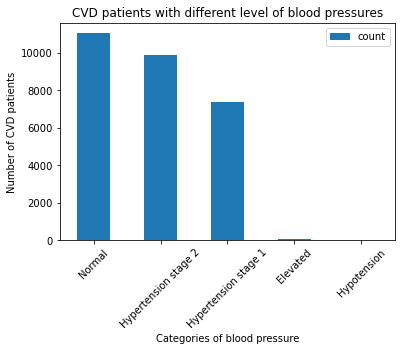

In [19]:
# Visualize the relationship between blood pressure categories and number of CVD patients
cardio_by_bp.plot.bar(x = "bp_cate", y = "count")
plt.title("CVD patients with different level of blood pressures")
plt.xticks(rotation = 45)
plt.xlabel("Categories of blood pressure")
plt.ylabel("Number of CVD patients")
plt.show()

Explanation:
> This figure indicates that high blood pressure did play a role in predicting the presence of CVDs; however, it is not the only determinate factor. CVD individuals with stage 2 hypertension are much more than those with stage 1 hypertension, which suggests a higher risk of CVDs when the blood pressure is too high. However, the plot also illustrates that the number of CVD individuals with normal blood pressure is greatest. Thus, there must be some other risk factors leading to the development of CVDs. 

###### What is the correlation between age, gender, weight, height and cardiovascular disease from this dataset?

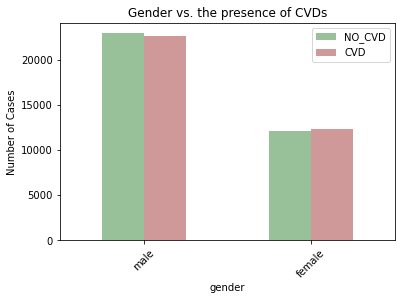

In [20]:
# Use bar chart to visualize the relationship between genders and the presence of CVDs 
cardio_df.groupby(['gender','cardio'])['cardio'].size().unstack('cardio', fill_value=0).plot.bar(alpha=0.4,color=['darkgreen','darkred']);
plt.xticks([0,1], ['male','female'], rotation=45)
plt.ylabel("Number of Cases")
plt.title("Gender vs. the presence of CVDs")
plt.legend(['NO_CVD','CVD'])
plt.show()

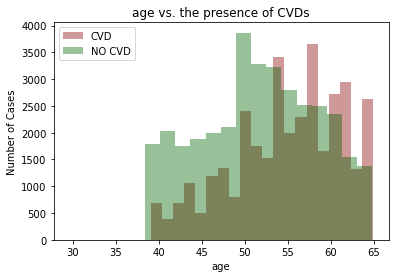

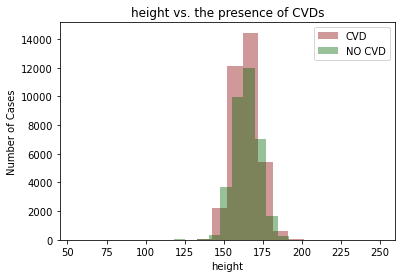

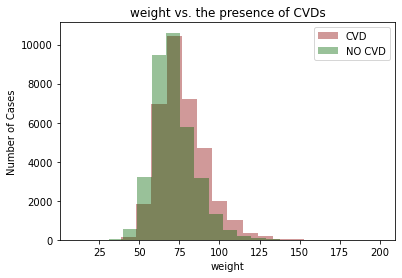

In [21]:
# Visualize the relationship between age/gender/weight/height with the number of CVD patients

# Create and run a function to visualize the relationship between potential risk factors and the presence of CVDs

lst_variables = ["age", "height", "weight"]
def vizCVD(variables):
    
    for var in variables:
        cvd= cardio_df[cardio_df['cardio'] == 1][var]
        nocvd = cardio_df[cardio_df['cardio'] == 0][var]
        plt.hist(cvd, bins=20, alpha=0.4, label='CVD', color='darkred');
        plt.hist(nocvd, bins=20, alpha=0.4, label='NO CVD', color='darkgreen')
        plt.xlabel(var)
        plt.ylabel("Number of Cases")
        plt.title(f"{var} vs. the presence of CVDs")
        plt.legend()
        plt.show()
    
vizCVD(lst_variables)

Explanation for the four figures above:

> From the gender plot, older adults are more likely to have CVDs regardless of gender. In particular, individuals aged 50 to 65 have a higher likelihood of having CVDs (Age plot). From the height plot, regardless of CVD or non-CVD cases, data is around the same height range. There is no salient difference in case numbers between the CVD and the non-CVD groups. Thus, we could infer that height is minorly attributed to the presence of CVDs. As for the relationship between weight and CVDs, from the weight plot, we found that heavier people are more likely to have CVDs compared to those who are on the lower weight side. 
In conclusion, we found that age and weight affect the presence of CVDs, while gender and height are less significant health risk factors. 

### Stroke Dataset EDA

In [22]:
# Load the data from the stroke csv data sources
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
# Check the dimension of the stroke_df
dim2 = stroke_df.shape
print(f"The stroke dataset contains {dim2[0]} rows, and {dim2[1]} columns.")

The stroke dataset contains 5110 rows, and 12 columns.


In [24]:
# Check the top of the stroke_df
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
# Check the bottom of the stroke_df
stroke_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [26]:
# Check the "n"s in the stroke dataset
missing_check_2 = stroke_df.isnull().sum()
missing_check_2

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
# Drop the n/a bmi rows
stroke_df = stroke_df.dropna()

In [28]:
# Check the data type of each column in the stroke dataset
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [29]:
# Convert specific columns from int to object
need_convert_cols_2 = ["id", "hypertension", "heart_disease", "stroke"]
convert_type(need_convert_cols_2, stroke_df, object)

<ipython-input-8-3c2a44fd3f25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]  = df[col].astype(c_type)


In [30]:
# Re-check data type of columns 
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   object 
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   object 
 4   heart_disease      4909 non-null   object 
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   object 
dtypes: float64(3), object(9)
memory usage: 498.6+ KB


In [31]:
# Check the statistic summary of columns with int data type 
round(stroke_df.describe(),2)

,age,avg_glucose_level,bmi
count,4909.00,4909.00,4909.00
mean,42.87,105.31,28.89
std,22.56,44.42,7.85
min,0.08,55.12,10.30
25%,25.00,77.07,23.50
50%,44.00,91.68,28.10
75%,60.00,113.57,33.10
max,82.00,271.74,97.60


The unit for bmi is kg/m^2, and the bmi in the dataset is within a reasonable range. However, we could only categorize the bmi for patients above 20 years old. For patients younger than 20, the bmi category depends on the percentile of bmi with the same age. The unit for glucose level is mg/dl, and the glucose level is within a reasonable range. We could not categorize the glucose level because we lacked information on when the levels were measured since the glucose levels were significantly different before and after the meal. 

In [35]:
# Export new csv file based on the modified stroke dataset
stroke_df.to_csv("new_stroke_data.csv")

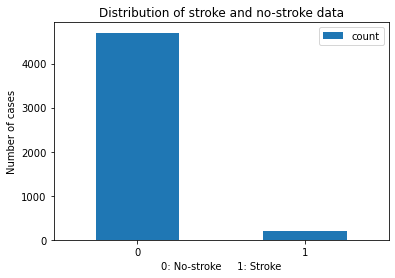

In [32]:
# Vizualize the stroke/no-stroke distribution 
stroke_compare = stroke_df["stroke"].groupby(stroke_df["stroke"]).agg({"count"})
stroke_compare = stroke_compare.reset_index()

stroke_compare.plot.bar(x = "stroke", y = "count")
plt.title("Distribution of stroke and no-stroke data")
plt.xticks(rotation = 0)
plt.xlabel("0: No-stroke     1: Stroke")
plt.ylabel("Number of cases")
plt.show()



In [33]:
# Compare the number of cases of stroke and no-stroke
stroke_compare

,stroke,count
0,0,4700
1,1,209


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


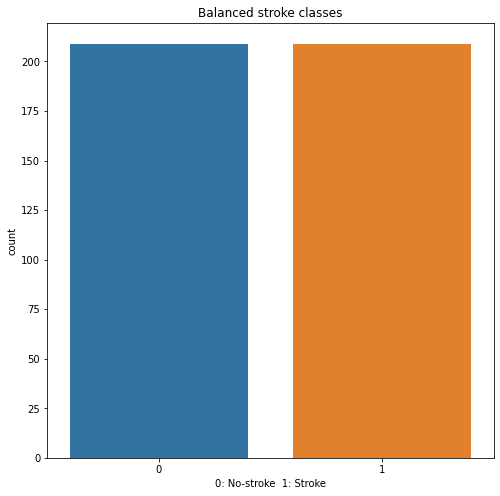

In [34]:
# Perform undersampling on the dataset to make 50% stroke vs. 50% no-stroke cases

# Shuffle the Dataset.
shuffled_stroke = stroke_df.sample(frac=1,random_state=4)

# Put all the  class in a separate dataset.
has_stroke = shuffled_stroke.loc[shuffled_stroke['stroke'] == 1]

# Randomly select 209 observations from the no-stroke class (majority class)
no_stroke = shuffled_stroke.loc[shuffled_stroke['stroke'] == 0].sample(n=209,random_state=42)

# Concatenate both dataframes again
normalized_stroke = pd.concat([has_stroke, no_stroke])

# Plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('stroke', data = normalized_stroke)
plt.title('Balanced stroke classes')
plt.xlabel("0: No-stroke  1: Stroke")
plt.show()

###### What is the correlation between age, gender, bmi, blood glucose level, smoking status, heart disease and stroke from this dataset?

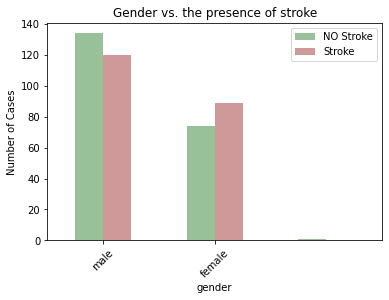

In [36]:
# Use bar chart to visualize the relationship between genders and the presence of stroke
normalized_stroke.groupby(['gender','stroke'])['stroke'].size().unstack('stroke', fill_value=0).plot.bar(alpha=0.4,color=['darkgreen','darkred']);
plt.xticks([0,1], ['male','female'], rotation=45)
plt.ylabel("Number of Cases")
plt.title("Gender vs. the presence of stroke")
plt.legend(['NO Stroke','Stroke'])
plt.show()

<AxesSubplot:>

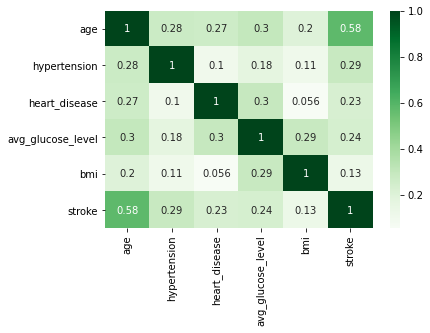

In [37]:
# Visualize the correlation of age, hypertention, heart disease, glucose level, bmi and stroke. 
corr_columns = ["hypertension", "heart_disease", "stroke"]
convert_type(corr_columns, normalized_stroke, int)
sns.heatmap(normalized_stroke.corr(), cmap = 'Greens',annot=True)

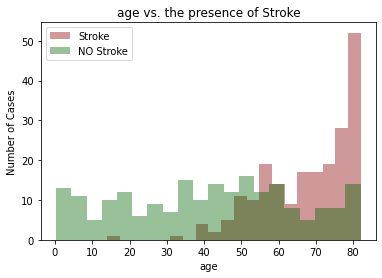

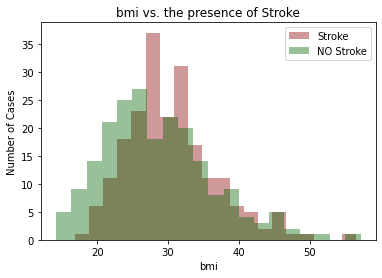

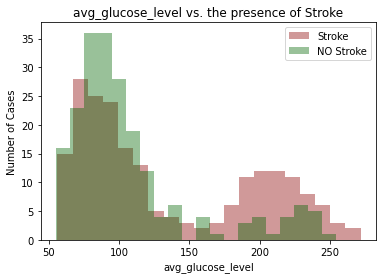

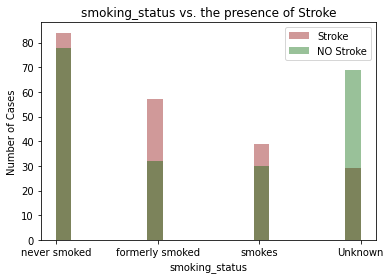

In [38]:
# Visualize the relationship between age/bmi/glucose level/smoking status with the number of stroke patients
stroke_variables = ["age", "bmi", "avg_glucose_level","smoking_status"]
def vizstroke(variables):
    
    for var in variables:
        stroke= normalized_stroke[normalized_stroke['stroke'] == 1][var]
        nostk = normalized_stroke[normalized_stroke['stroke'] == 0][var]
        plt.hist(stroke, bins=20, alpha=0.4, label='Stroke', color='darkred');
        plt.hist(nostk, bins=20, alpha=0.4, label='NO Stroke', color='darkgreen')
        plt.xlabel(var)
        plt.ylabel("Number of Cases")
        plt.title(f"{var} vs. the presence of Stroke")
        plt.legend()
        plt.show()
    
vizstroke(stroke_variables)

Explanation for the six figures above:
> From the gender plot, the female patients have higher stroke cases than non-stroke cases. According to the correlation seaborn plot, age has the highest correlation with the stroke, 0.58. In addition, age is also highly correlated to glucose level, heart disease, and hypertension. As the age increases, other values would also increase. From the bar charts, we know that the number of stroke cases suddenly increases after 50 years old. Stroke cases are also higher when bmi is between 25-35 kg/m^2, and they also increase a lot when the average glucose level is above approximately 150mg/dL. Conversely, individuals with normal glucose levels are less likely to have a stroke. The ratio between stroke cases vs. no stroke cases is small when individuals never smoke. The ratio is much higher in formerly smoked and smoking individuals. 

References: 
[1] https://www.easyyogasan.com/low-bp-symptoms-causes-treatment/
[2] https://www.singlecare.com/blog/normal-blood-glucose-levels/
[3] https://www.medicalnewstoday.com/articles/323622#health-risks-of-extra-weight